Credit card fraud detection


In [77]:
# imports
import numpy as np
import pandas as pd


In [78]:
# https://drive.google.com/file/d/12pHJrBYN1WyPGq3KofD5rYMiu1WkslMG/view?usp=sharing

In [79]:
!pip install -U gdown  # optional, ensures latest version
import gdown

In [80]:
file_id = '12pHJrBYN1WyPGq3KofD5rYMiu1WkslMG'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'data.csv', quiet=False)

import pandas as pd
df = pd.read_csv('data.csv')
df.head()


Downloading...
From (original): https://drive.google.com/uc?id=12pHJrBYN1WyPGq3KofD5rYMiu1WkslMG
From (redirected): https://drive.google.com/uc?id=12pHJrBYN1WyPGq3KofD5rYMiu1WkslMG&confirm=t&uuid=c1650284-2469-44c3-9f8d-c3c2b781b593
To: /content/data.csv
100%|██████████| 151M/151M [00:01<00:00, 103MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [81]:
pd.set_option('display.max_columns',100)

In [82]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [83]:
print(df.shape)

(284807, 31)


In [84]:
df.sample(50, random_state=42)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
101565,67878.0,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,-2.084080,0.480381,0.473738,-2.192276,0.773942,0.294484,0.406074,-0.541855,1.031450,0.017076,0.618411,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,100.00,0
260880,159763.0,2.023952,-0.120140,-1.086918,0.423019,-0.142901,-1.127752,0.178493,-0.303234,0.564509,0.062831,-0.720047,0.366835,-0.110857,0.319094,0.108359,-0.153633,-0.221312,-0.934141,0.070553,-0.210864,-0.276175,-0.697708,0.335631,-0.017196,-0.324904,0.200023,-0.071566,-0.058224,16.99,0
214337,139631.0,-0.688944,1.292153,-0.564281,-1.457526,2.258333,-0.323270,1.678984,-0.104128,-1.285351,-1.303435,0.282728,-0.402525,-0.548687,-0.504283,-0.685339,0.714828,-0.092674,0.798953,-0.150085,-0.037150,-0.006880,-0.171568,-0.720019,-0.419435,1.211991,0.670916,-0.103986,0.030084,8.95,0
201575,133944.0,2.119362,0.142639,-2.373337,0.541949,0.608419,-1.775564,0.955775,-0.599383,0.010420,0.295305,-0.936569,-0.452478,-1.340798,1.077459,-0.099584,-0.815072,0.018481,-0.639446,-0.065427,-0.323573,0.264264,0.898266,-0.168063,0.059311,0.626949,0.729035,-0.129120,-0.094713,10.00,0
81055,58769.0,-5.584256,-4.732413,-0.448452,-0.121442,-0.707412,-0.114376,-1.554628,1.402126,-0.031693,-0.942358,-2.439501,-0.552312,-0.295588,-0.250246,-1.197732,1.549553,0.933237,-1.237689,0.416832,-1.046900,0.041651,0.621789,0.223467,-0.770137,0.621182,-0.028738,0.505194,-1.898323,101.49,0


View data

In [85]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [86]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [87]:
df.sample(5, random_state= 42)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [89]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [90]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [91]:
df.index

RangeIndex(start=0, stop=284807, step=1)

In [92]:
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


Exploratory Data Analysis (EDA)

In [93]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [94]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,2.125498e-16,2.053457e-16,-2.425603e-17,-5.020280e-16,3.547782e-16,7.212815e-17,-3.879840e-16,3.230206e-17,1.502024e-16,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,1.975426e-16,-9.568710e-17,6.295388e-16,-1.730566e-16,-4.995814e-17,1.177316e-17,-2.685296e-16,3.284605e-16,-7.118719e-18,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,1.576830e-15,6.310231e-16,2.807652e-16,4.739859e-16,9.068793e-16,8.299445e-16,7.614712e-16,1.509897e-16,3.463522e-16,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,3.459380e-16,-5.625518e-16,1.303306e-16,2.282280e-16,1.377649e-16,-9.614528e-16,-2.699612e-16,-5.103644e-16,-3.980557e-16,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,7.203963e-16,7.412552e-16,5.886991e-16,6.565143e-16,-8.720275e-16,2.246261e-15,1.281914e-16,5.308590e-16,-1.450421e-16,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,1.980503e-15,2.375468e-16,-1.211182e-16,2.621312e-16,-1.531188e-15,2.623672e-18,2.015618e-16,1.223814e-16,-1.865597e-16,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,1.425248e-16,-3.536655e-18,1.266462e-17,2.607772e-16,-1.690540e-16,5.869302e-17,2.177192e-16,7.604126e-17,-1.881008e-16,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,2.487043e-16,1.839891e-16,-2.921856e-16,-8.599156e-16,4.127777e-16,-5.254741e-16,-2.269549e-16,-3.667974e-16,-3.875186e-16,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,1.354680e-16,-1.079314e-15,2.251072e-15,3.784757e-15,

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [97]:
df['Class'].unique()

array([0, 1])

<Axes: xlabel='Class'>

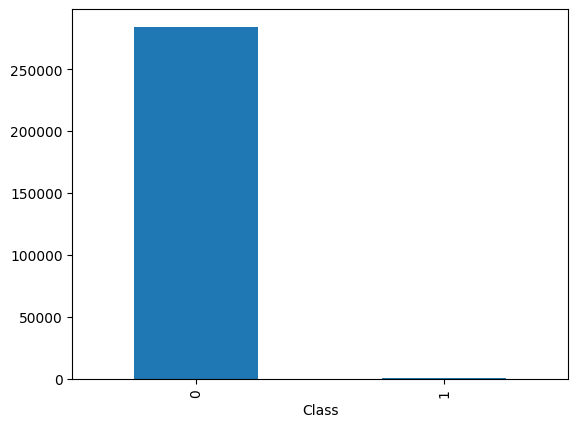

In [98]:
df['Class'].value_counts().plot(kind='bar')

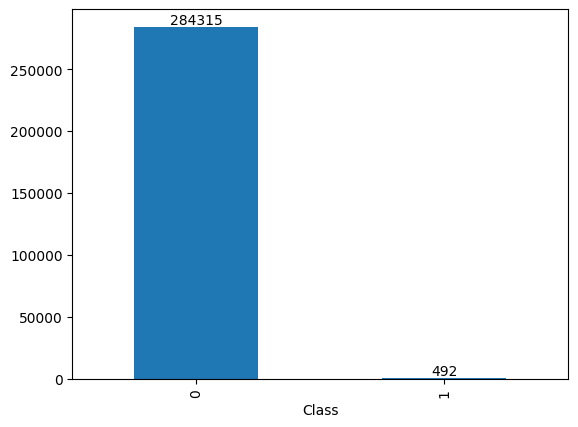

In [99]:
ax = df['Class'].value_counts().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)

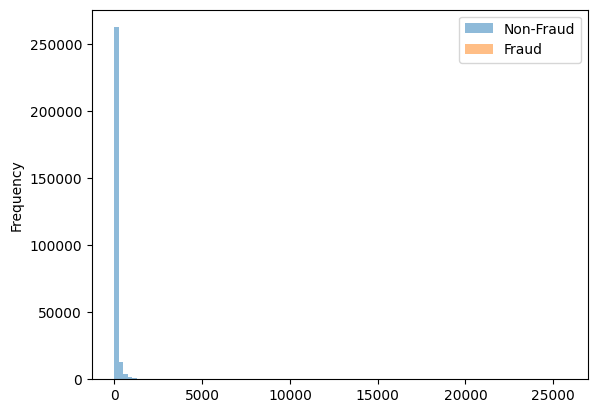

In [100]:
df[df['Class']==0]['Amount'].plot.hist(bins=100, alpha=0.5, label='Non-Fraud')
df[df['Class']==1]['Amount'].plot.hist(bins=100, alpha=0.5, label='Fraud')
plt.legend()

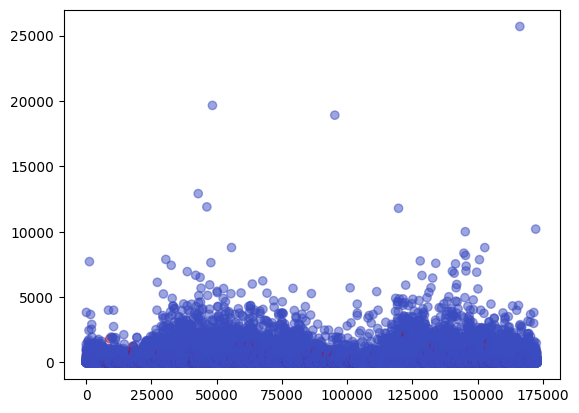

In [101]:
plt.scatter(df['Time'], df['Amount'], c=df['Class'], cmap='coolwarm', alpha=0.5)


<Axes: >

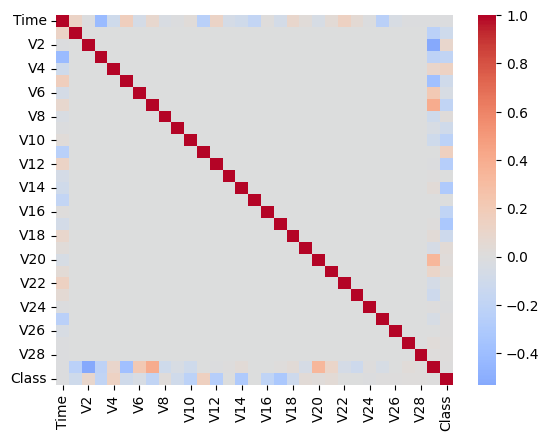

In [102]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)


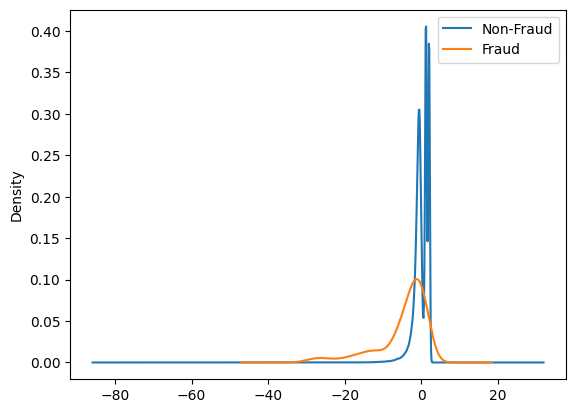

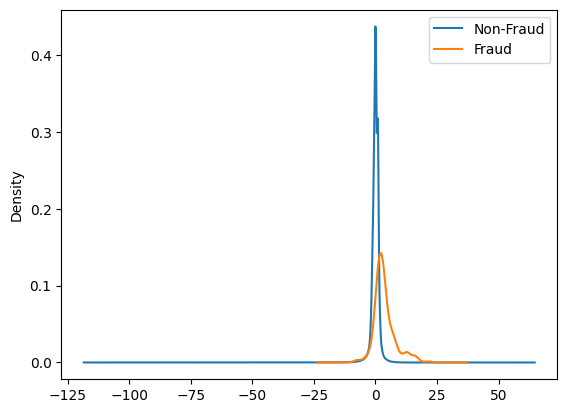

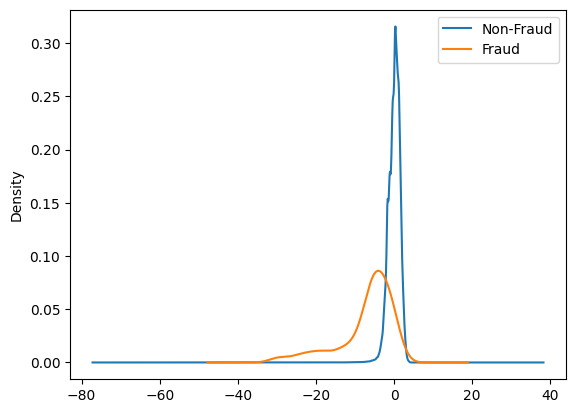

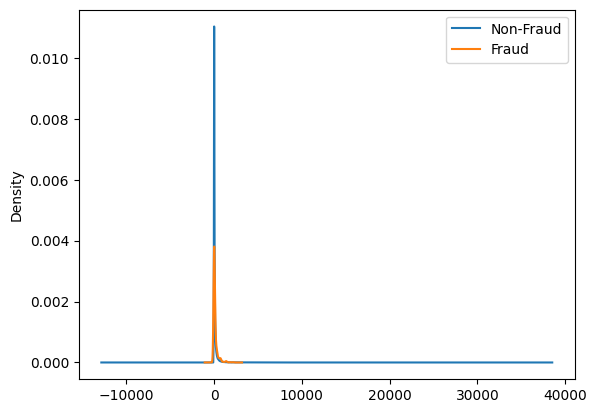

In [103]:
for col in ['V1','V2','V3','Amount']:
    plt.figure()
    df[df['Class']==0][col].plot.kde(label='Non-Fraud')
    df[df['Class']==1][col].plot.kde(label='Fraud')
    plt.legend()


<Axes: xlabel='Class', ylabel='V14'>

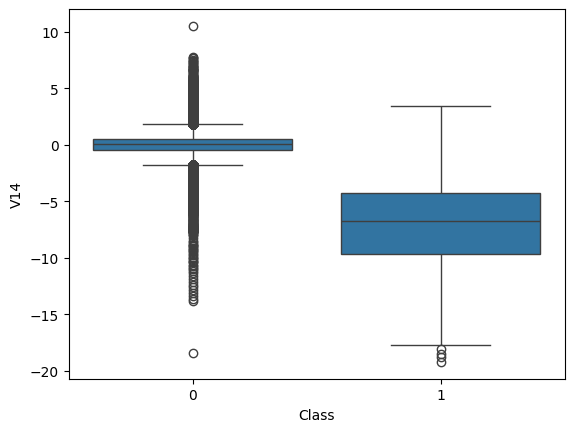

In [104]:
sns.boxplot(x='Class', y='V14', data=df)


/tmp/ipython-input-4225915401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('AmountBin')['Class'].mean()


<Axes: xlabel='AmountBin'>

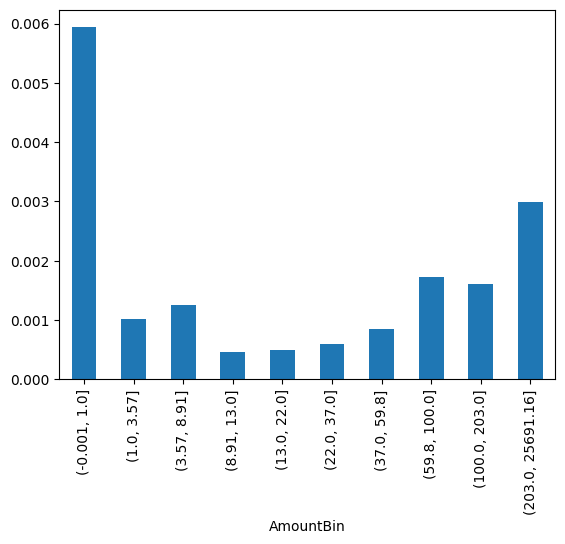

In [105]:
df['AmountBin'] = pd.qcut(df['Amount'], 10)
fraud_rate = df.groupby('AmountBin')['Class'].mean()
fraud_rate.plot(kind='bar')


In [106]:
data = df.copy()

In [107]:
# y = data['Class']
X = data.drop(['Time','Class','AmountBin'], axis=1)
print(X.shape)
print(y.shape)


(284807, 29)
(284807,)


In [108]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [109]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [110]:
# Train Test Splitting

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size= 0.20, random_state=42)

In [113]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(227845, 29)
(56962, 29)
(227845,)
(56962,)


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression


In [115]:
def apply_logistic(xtrain, ytrain, xtest, ytest):
  print('Logistic Regression without class_weight:')
  model_lr = LogisticRegression(max_iter=1000)
  model_lr.fit(xtrain, ytrain)
  lr_pred = model_lr.predict(xtest)

  acc = accuracy_score(ytest, lr_pred)
  prec = precision_score(ytest, lr_pred)
  rec = recall_score(ytest, lr_pred)
  f1 = f1_score(ytest, lr_pred)

  print(f"Accuracy : {acc:.4f}")
  print(f"Precision: {prec:.4f}")
  print(f"Recall   : {rec:.4f}")
  print(f"F1 Score : {f1:.4f}")
  lr_pred_prob = model_lr.predict_proba(xtest)[:, 1]


  prec_curve, rec_curve, thresholds_pr = precision_recall_curve(ytest, lr_pred_prob)
  pr_auc = auc(rec_curve, prec_curve)

  plt.figure()
  plt.plot(rec_curve, prec_curve, label=f"PR Curve (AUC = {pr_auc:.4f})")
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Precision-Recall Curve")
  plt.legend()
  plt.show()
  print(f'Metrics values prec_curve: {prec_curve},rec_curve: {rec_curve},thresholds_pr: {thresholds_pr}')

  fpr, tpr, thresholds_roc = roc_curve(ytest, lr_pred_prob)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
  plt.plot([0, 1], [0, 1], 'k--')  # random baseline
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()




Logistic Regression without class_weight:
Accuracy : 0.9991
Precision: 0.8657
Recall   : 0.5918
F1 Score : 0.7030


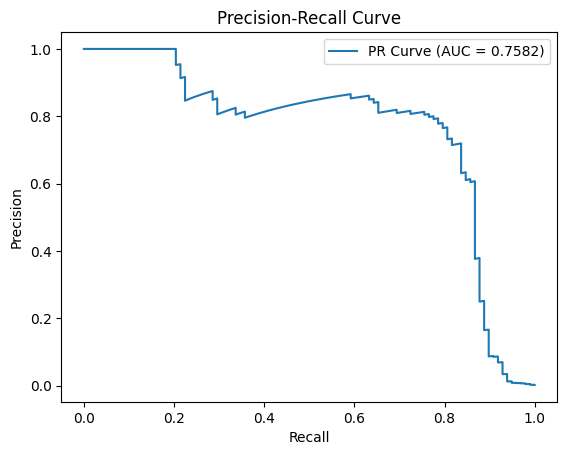

Metrics values prec_curve: [0.00172045 0.00172048 0.00172051 ... 1.         1.         1.        ],rec_curve: [1.         1.         1.         ... 0.02040816 0.01020408 0.        ],thresholds_pr: [1.90976056e-10 4.11975966e-10 6.12850185e-10 ... 9.99999993e-01
 9.99999998e-01 9.99999999e-01]


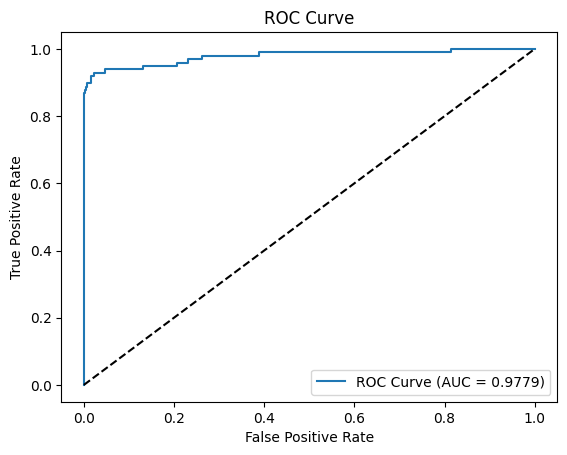

In [116]:
apply_logistic(xtrain, ytrain, xtest, ytest)

In [117]:
def apply_weight_logistic(xtrain, ytrain, xtest, ytest):
  print('Logistic Regression with class_weight:')
  # model_lr = LogisticRegression(max_iter=1000)
  model_lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',   # auto-adjusts weights inversely to class frequencies
    solver='liblinear'         # or 'saga' for large datasets
)
  model_lr.fit(xtrain, ytrain)
  lr_pred = model_lr.predict(xtest)

  acc = accuracy_score(ytest, lr_pred)
  prec = precision_score(ytest, lr_pred)
  rec = recall_score(ytest, lr_pred)
  f1 = f1_score(ytest, lr_pred)

  print(f"Accuracy : {acc:.4f}")
  print(f"Precision: {prec:.4f}")
  print(f"Recall   : {rec:.4f}")
  print(f"F1 Score : {f1:.4f}")
  lr_pred_prob = model_lr.predict_proba(xtest)[:, 1]


  prec_curve, rec_curve, thresholds_pr = precision_recall_curve(ytest, lr_pred_prob)
  pr_auc = auc(rec_curve, prec_curve)

  plt.figure()
  plt.plot(rec_curve, prec_curve, label=f"PR Curve (AUC = {pr_auc:.4f})")
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Precision-Recall Curve")
  plt.legend()
  plt.show()
  print(f'Metrics values prec_curve: {prec_curve},rec_curve: {rec_curve},thresholds_pr: {thresholds_pr}')

  fpr, tpr, thresholds_roc = roc_curve(ytest, lr_pred_prob)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
  plt.plot([0, 1], [0, 1], 'k--')  # random baseline
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()




Logistic Regression with class_weight:
Accuracy : 0.9758
Precision: 0.0617
Recall   : 0.9184
F1 Score : 0.1156


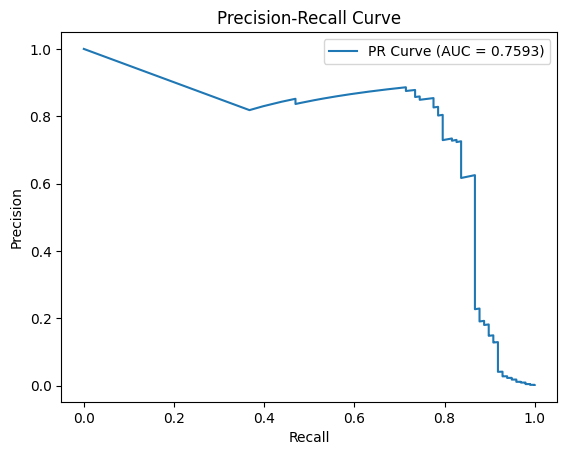

Metrics values prec_curve: [0.00172045 0.00172048 0.00172051 ... 0.82978723 0.81818182 1.        ],rec_curve: [1.         1.         1.         ... 0.39795918 0.36734694 0.        ],thresholds_pr: [8.00663063e-32 6.45016650e-26 6.22138229e-25 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


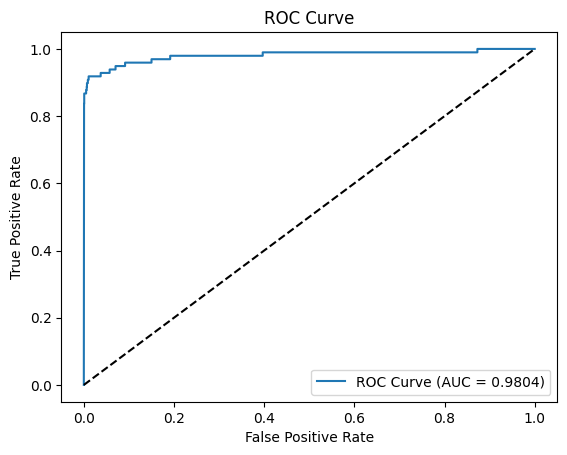

In [118]:
apply_weight_logistic(xtrain, ytrain, xtest, ytest)

In [119]:
from xgboost import XGBClassifier

In [120]:
def apply_xgb(xtrain, ytrain, xtest, ytest):
  print('XGB Regression with class_weight:')
  # model_lr = XGBClassifier(max_iter=1000)
  model_lr = XGBClassifier()
  model_lr.fit(xtrain, ytrain)
  lr_pred = model_lr.predict(xtest)

  acc = accuracy_score(ytest, lr_pred)
  prec = precision_score(ytest, lr_pred)
  rec = recall_score(ytest, lr_pred)
  f1 = f1_score(ytest, lr_pred)

  print(f"Accuracy : {acc:.4f}")
  print(f"Precision: {prec:.4f}")
  print(f"Recall   : {rec:.4f}")
  print(f"F1 Score : {f1:.4f}")
  lr_pred_prob = model_lr.predict_proba(xtest)[:, 1]


  prec_curve, rec_curve, thresholds_pr = precision_recall_curve(ytest, lr_pred_prob)
  pr_auc = auc(rec_curve, prec_curve)

  plt.figure()
  plt.plot(rec_curve, prec_curve, label=f"PR Curve (AUC = {pr_auc:.4f})")
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Precision-Recall Curve")
  plt.legend()
  plt.show()
  print(f'Metrics values prec_curve: {prec_curve},rec_curve: {rec_curve},thresholds_pr: {thresholds_pr}')

  fpr, tpr, thresholds_roc = roc_curve(ytest, lr_pred_prob)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
  plt.plot([0, 1], [0, 1], 'k--')  # random baseline
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()




XGB Regression with class_weight:
Accuracy : 0.9995
Precision: 0.9286
Recall   : 0.7959
F1 Score : 0.8571


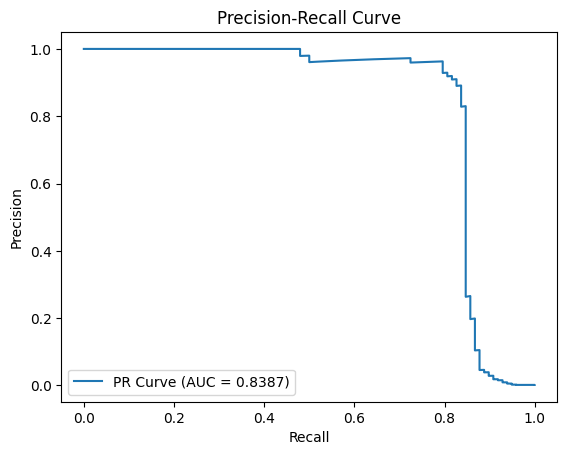

Metrics values prec_curve: [0.00172045 0.00172048 0.00172051 ... 1.         1.         1.        ],rec_curve: [1.         1.         1.         ... 0.37755102 0.36734694 0.        ],thresholds_pr: [7.4197158e-34 1.2125997e-33 2.9714574e-33 ... 9.9999940e-01 9.9999964e-01
 1.0000000e+00]


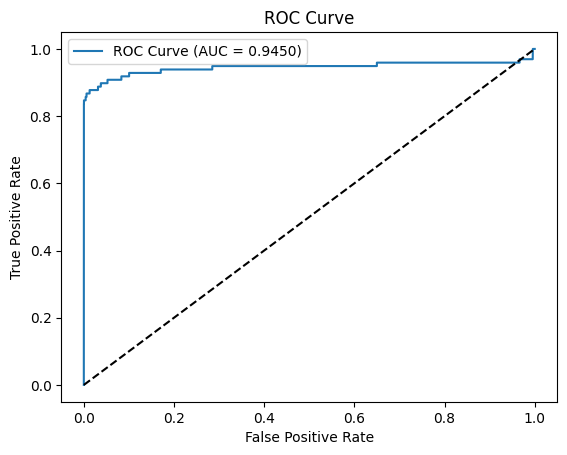

In [121]:
apply_xgb(xtrain, ytrain, xtest, ytest)

In [123]:
def apply_weight_xgb(xtrain, ytrain, xtest, ytest):
  print('XGB Regression with class_weight:')
# calculate class weight ratio
  neg, pos = np.bincount(ytrain)   # counts of class 0 and 1
  scale_pos_weight = neg / pos

  print("Scale_Pos_Weight:", scale_pos_weight)

  model_lr = XGBClassifier(
      n_estimators=200,
      max_depth=5,
      learning_rate=0.1,
      scale_pos_weight=scale_pos_weight,  # imbalance handling
      eval_metric="auc"
  )
  model_lr.fit(xtrain, ytrain)
  lr_pred = model_lr.predict(xtest)

  acc = accuracy_score(ytest, lr_pred)
  prec = precision_score(ytest, lr_pred)
  rec = recall_score(ytest, lr_pred)
  f1 = f1_score(ytest, lr_pred)

  print(f"Accuracy : {acc:.4f}")
  print(f"Precision: {prec:.4f}")
  print(f"Recall   : {rec:.4f}")
  print(f"F1 Score : {f1:.4f}")
  lr_pred_prob = model_lr.predict_proba(xtest)[:, 1]


  prec_curve, rec_curve, thresholds_pr = precision_recall_curve(ytest, lr_pred_prob)
  pr_auc = auc(rec_curve, prec_curve)

  plt.figure()
  plt.plot(rec_curve, prec_curve, label=f"PR Curve (AUC = {pr_auc:.4f})")
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Precision-Recall Curve")
  plt.legend()
  plt.show()
  print(f'Metrics values prec_curve: {prec_curve},rec_curve: {rec_curve},thresholds_pr: {thresholds_pr}')

  fpr, tpr, thresholds_roc = roc_curve(ytest, lr_pred_prob)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
  plt.plot([0, 1], [0, 1], 'k--')  # random baseline
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()




XGB Regression with class_weight:
Scale_Pos_Weight: 577.2868020304569
Accuracy : 0.9995
Precision: 0.8817
Recall   : 0.8367
F1 Score : 0.8586


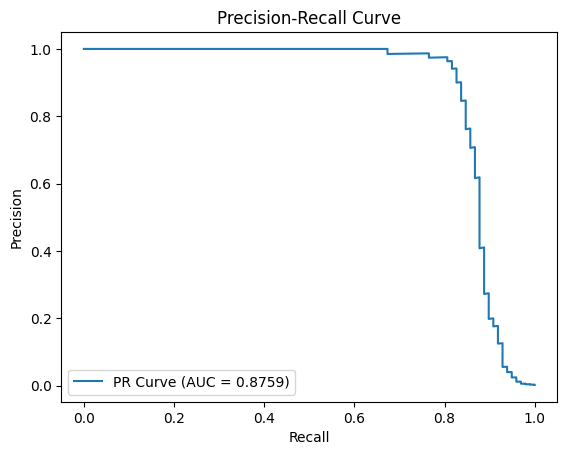

Metrics values prec_curve: [0.00172045 0.00172048 0.00172051 ... 1.         1.         1.        ],rec_curve: [1.         1.         1.         ... 0.03061224 0.02040816 0.        ],thresholds_pr: [1.6759648e-07 2.3793721e-07 2.8335478e-07 ... 9.9999189e-01 9.9999225e-01
 9.9999249e-01]


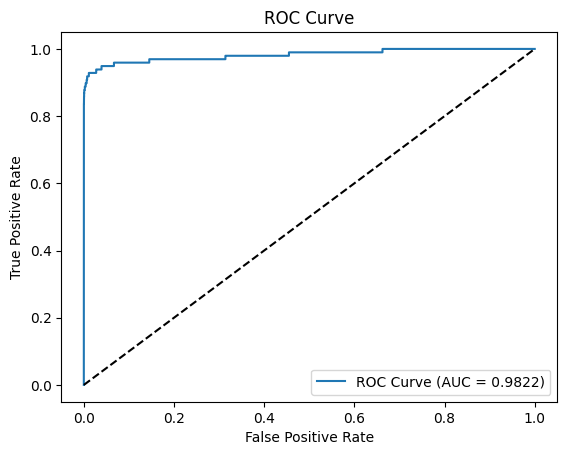

In [124]:
apply_weight_xgb(xtrain, ytrain, xtest, ytest)

In [127]:
from lightgbm import LGBMClassifier


def apply_weight_lgbm(xtrain, ytrain, xtest, ytest):
  print('LGBM Regression with is_unbalance :')


  model_lr = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    is_unbalance=True,        # auto-handles imbalance
    objective='binary',
    metric='auc'
)
  model_lr.fit(xtrain, ytrain)
  lr_pred = model_lr.predict(xtest)

  acc = accuracy_score(ytest, lr_pred)
  prec = precision_score(ytest, lr_pred)
  rec = recall_score(ytest, lr_pred)
  f1 = f1_score(ytest, lr_pred)

  print(f"Accuracy : {acc:.4f}")
  print(f"Precision: {prec:.4f}")
  print(f"Recall   : {rec:.4f}")
  print(f"F1 Score : {f1:.4f}")
  lr_pred_prob = model_lr.predict_proba(xtest)[:, 1]


  prec_curve, rec_curve, thresholds_pr = precision_recall_curve(ytest, lr_pred_prob)
  pr_auc = auc(rec_curve, prec_curve)

  plt.figure()
  plt.plot(rec_curve, prec_curve, label=f"PR Curve (AUC = {pr_auc:.4f})")
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Precision-Recall Curve")
  plt.legend()
  plt.show()
  print(f'Metrics values prec_curve: {prec_curve},rec_curve: {rec_curve},thresholds_pr: {thresholds_pr}')

  fpr, tpr, thresholds_roc = roc_curve(ytest, lr_pred_prob)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
  plt.plot([0, 1], [0, 1], 'k--')  # random baseline
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()




LGBM Regression with is_unbalance :
[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

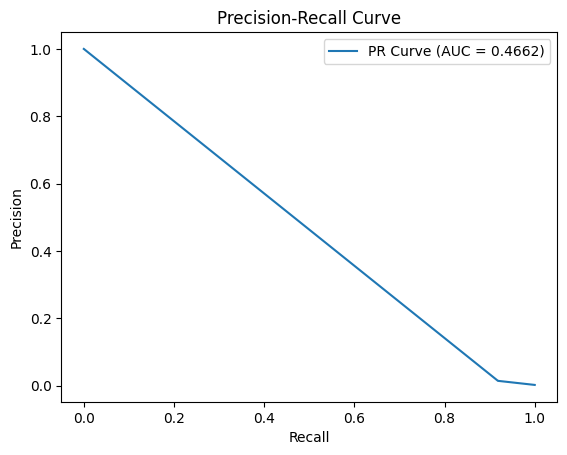

Metrics values prec_curve: [0.00172045 0.01383977 0.01384189 0.01384402 0.01384615 0.01384828
 0.01385042 0.01385255 0.01385468 0.01385681 0.01385895 0.01386108
 1.        ],rec_curve: [1.         0.91836735 0.91836735 0.91836735 0.91836735 0.91836735
 0.91836735 0.91836735 0.91836735 0.91836735 0.91836735 0.91836735
 0.        ],thresholds_pr: [0.00000000e+000 5.42542744e-305 4.99595957e-296 1.16236350e-232
 2.98332879e-210 1.02888701e-195 4.84150658e-062 2.33442646e-046
 2.02819790e-032 3.38379974e-012 1.00000000e+000 1.00000000e+000]


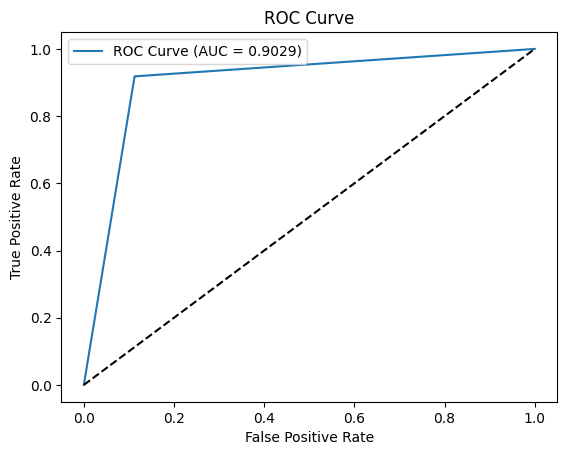

In [128]:
apply_weight_lgbm(xtrain, ytrain, xtest, ytest)

In [129]:
#Conclusion: XGBoost is found to be working better than other algorithms